In [1]:
import pandas            as pd
import matplotlib.pyplot as plt
import numpy             as np

import matplotlib
import sys

sys.path.append('/mnt/netapp2/Store_uni/home/usc/ie/dcr/software/hk')
sys.path.append('/mnt/netapp2/Store_uni/home/usc/ie/dcr/software/hk/hipy')

# Import Diego's tools
from WCSimFilePackages.npz_to_df import truehits_info_to_df
from WCSimFilePackages.npz_to_df import simple_track_info_to_df

from tqdm.notebook import tqdm

import hipy.pltext as pltext
import hipy.utils  as ut

pd.set_option('display.max_rows', 100000)
pd.set_option('display.max_columns', 100000)

%load_ext autoreload
%autoreload 2

In [2]:
npz     = '/mnt/netapp2/Store_uni/home/usc/ie/dcr/software/hk/WCSim_old/install/npz/nicfVec_0kHz_NOTRIGGER_50kevents_actualPrototype.npz'
# npz     = '/mnt/netapp2/Store_uni/home/usc/ie/dcr/software/hk/WCSim/build/mydir/npz/./50kneutrons_NiCf.npz'
nevents = 50000

# Creación del DataFrame de DigiHits usando la función digihits_info_to_df
df_trueHits = truehits_info_to_df(npz).dropna()
df_simpleTracks = simple_track_info_to_df(npz).dropna()

In [3]:
df_trueHits.head()

,event_id,true_hit_parent,true_hit_pmt,true_hit_time,true_hit_start_time,hit_x,hit_y,hit_z,hit_start_x,hit_start_y,hit_start_z,true_hit_creatorProcess,hit_r,hit_start_r
1,1,8,1801,7.725062,1.784413,-5.836419,135.115128,99.28743,-9.988919,11.473467,61.445007,Cerenkov,167.774120,63.300141
1,1,8,1664,9.098529,1.78649,47.053452,134.587173,71.08123,-9.975455,11.501704,61.470253,Cerenkov,159.311882,63.327647
1,1,82,776,67162911906979751437271040.0,67162911906979751437271040.0,-2.620486,-116.460571,-152.337265,22.966244,-33.137585,-44.26717,Cerenkov,191.772193,59.875957
1,1,82,1019,67162911906979751437271040.0,67162911906979751437271040.0,-17.469955,-135.72049,-64.299248,22.954311,-33.079155,-44.252098,Cerenkov,151.194060,59.827912
1,1,82,1985,67162911906979751437271040.0,67162911906979751437271040.0,-109.743286,135.544525,75.041946,22.949064,-33.053459,-44.245472,Cerenkov,189.861004,59.806793


In [54]:
captureIDs = df_simpleTracks[(df_simpleTracks["track_creator_process"].values == "nCapture") & 
                (df_simpleTracks["track_ri"].values < 6.8) & 
                (df_simpleTracks["track_pid"].values != 22)]["track_pid"].values

In [55]:
captureIDs = [str(i)[4:7] for i in captureIDs]

In [56]:
captureIDs = [int(i)/10 for i in captureIDs]

Text(7, 700, 'Captures in Nickel:       1377')

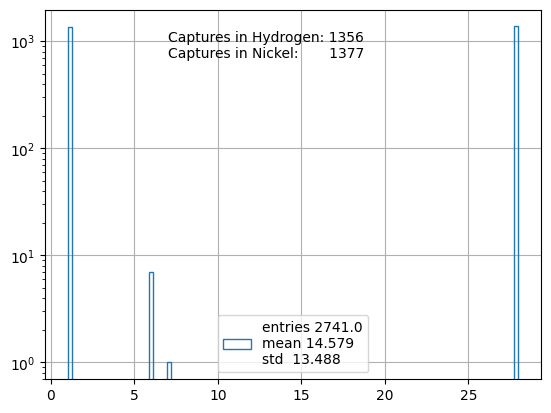

In [68]:
pltext.hist(captureIDs, 100, ylog=True);
plt.annotate(f"Captures in Hydrogen: {captureIDs.count(1)}", (7, 1e3))
plt.annotate(f"Captures in Nickel:       {captureIDs.count(28)}", (7, 700))

In [5]:
df_simpleTracks[df_simpleTracks["event_id"].values == 1].head(20)

,event_id,track_pid,track_id,track_parent,track_creator_process,track_energy,track_ti,track_ri,track_rf
1,1,0,0,0,initial,0.0,0.0,0.0,0.0
1,1,0,0,0,initial,0.0,0.0,0.0,0.0
1,1,22,1,0,initial,1.496841,0.0,10.0,82.20195
1,1,22,2,0,initial,0.46301,67162911906979751437271040.0,10.0,28.289141
1,1,22,3,0,initial,0.106074,67162911906979751437271040.0,10.0,48.523178
1,1,22,4,0,initial,0.763449,67162911906979751437271040.0,10.0,53.962963
1,1,22,5,0,initial,0.583188,67162911906979751437271040.0,10.0,48.803482
1,1,22,6,0,initial,2.614504,67162911906979751437271040.0,10.0,128.925522
1,1,11,7,1,compt,0.748992,1.696278,60.853146,60.881763
1,1,11,10,1,compt,0.535691,3.186351,90.581215,90.581619


In [33]:
def mean_uncertainty(incertidumbres):
    return np.sqrt(np.sum(np.array(incertidumbres)**2)) / len(incertidumbres)

def generate_legend_text(data):
    entries = len(data)
    mean    = np.mean(data)

    data_stat_unc = [np.sqrt(i) for i in data]
    mean_sigma = mean_uncertainty(data_stat_unc)

    # Create legend with statistics
    # For the average rate, we have hits/PMT * A decays/s / decays = hits/(PMT * s)
    legend_text = (f'Entries = {entries}\n'
                   f'Average No. Hits = {mean:.2f} $\pm$ {mean_sigma:.2f}'
    )

    return legend_text

# Simulation No. Hits and Time Window Final Results

In [69]:
df = df_trueHits[(df_trueHits['true_hit_time'].values < 3.6e12)]

In [73]:
number_of_cherenkov_hits = []
cherenkov_window = []
cherenkov_window_trms = []

for i in tqdm(range(nevents), total=nevents):
    temp_df = df[df['event_id'].values == i]
    number_of_cherenkov_hits.append(len(temp_df))
    cher_times  = temp_df['true_hit_time'].values
    if len(cher_times) > 1:
        time_diff = np.max(cher_times) - np.min(cher_times)
        time_trms = np.std(cher_times)
        cherenkov_window.append(time_diff)
        cherenkov_window_trms.append(time_trms)
    elif len(cher_times) == 1:
        cherenkov_window.append(cher_times[0])
        cherenkov_window_trms.append(cher_times[0])

  0%|          | 0/50000 [00:00<?, ?it/s]

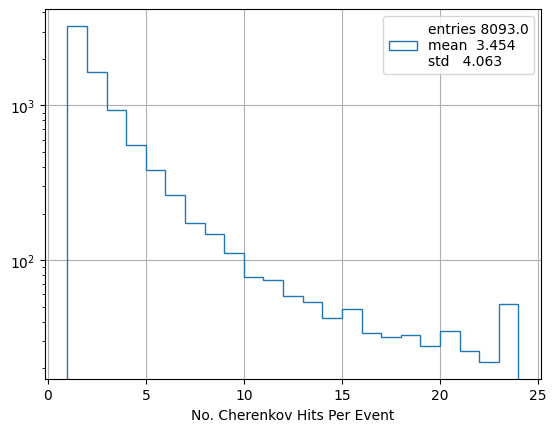

In [71]:
nonZero_number_of_cherenkov_hits = [i for i in number_of_cherenkov_hits if i != 0 and i < 25]
pltext.hist(nonZero_number_of_cherenkov_hits, 23, xylabels="No. Cherenkov Hits Per Event", ylog=True);

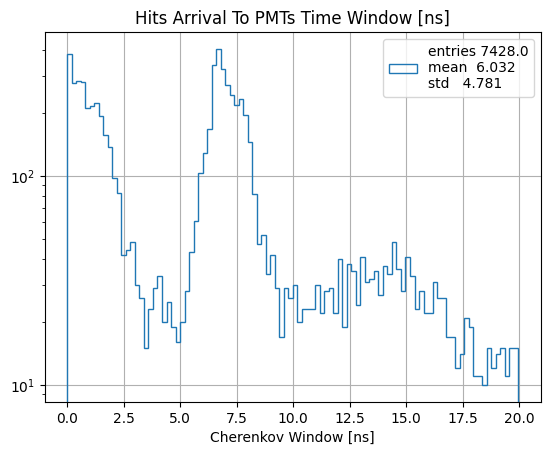

In [72]:
time_with_cut = [i for i in cherenkov_window if i != 0 and i<20]
pltext.hist(time_with_cut, 100, xylabels="Cherenkov Window [ns]", ylog=True);

plt.title("Hits Arrival To PMTs Time Window [ns]");

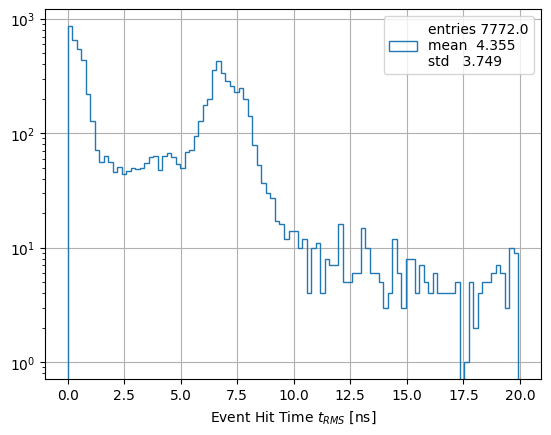

In [91]:
trms_cut = [i for i in cherenkov_window_trms if i < 20]
pltext.hist(trms_cut, 100, ylog=True, xylabels="Event Hit Time $t_{RMS}$ [ns]");

In [78]:
print(f"% of events in the <20 ns zone: {len(time_with_cut)/len(cherenkov_window)*100:.2f}%")

% of events in the <20 ns zone: 77.84%


In [39]:
print(f"% of the total events with hits in the <20 ns zone: {len(time_with_cut)/nevents*100:.2f}%")

% of the total events with hits in the <20 ns zone: 13.28%


In [46]:
df_only_initial_gammas = df_simpleTracks[(df_simpleTracks['track_creator_process'].values == "initial") & 
                                         (df_simpleTracks['track_pid'].values == 22) &
                                         (df_simpleTracks['track_ti'].values == 0.0)]

In [47]:
times = []
for i in tqdm(range(nevents), total=nevents):
    temp_df = df_simpleTracks[df_simpleTracks['event_id'].values == i]
    initial_gammas_df = df_only_initial_gammas[df_only_initial_gammas["event_id"].values == i]
    if len(temp_df) > 2:
        initial_gammas = initial_gammas_df['track_id'].values
        
        electrons_from_initial_gammas = temp_df[(temp_df['track_parent'].isin(initial_gammas))]['track_id'].values

        trueHits_temp_df = df[(df['event_id'].values == i) & 
                              (df['true_hit_parent'].isin(electrons_from_initial_gammas))]
        
        data = trueHits_temp_df['true_hit_time'].values
        if len(data) > 1:
            times.append(np.max(data) - np.min(data))



  0%|          | 0/50000 [00:00<?, ?it/s]

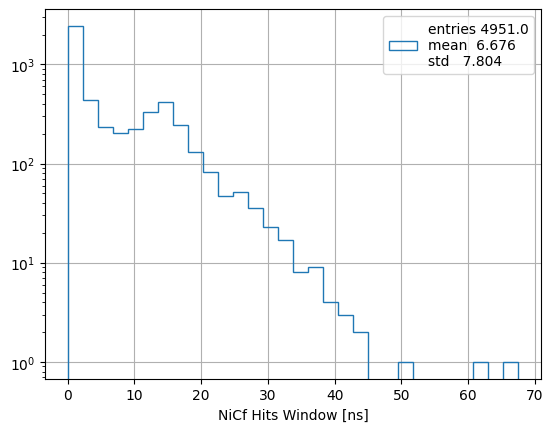

In [50]:
pltext.hist(times, 30, xylabels="NiCf Hits Window [ns]", ylog=True);

In [51]:
time_corrected_number_of_cherenkov_hits = []
cherenkov_window = []

for i in tqdm(range(nevents), total=nevents):
    temp_df = df[df['event_id'].values == i]
    cher_times = temp_df['true_hit_time'].values
    
    if len(cher_times) > 1:
        time_diff = np.max(cher_times) - np.min(cher_times)
        cherenkov_window.append(time_diff)
        if time_diff <= 1e3:
            time_corrected_number_of_cherenkov_hits.append(len(temp_df))

    elif len(cher_times) == 1:
        cherenkov_window.append(cher_times[0])
        if cher_times[0] <= 1e3:
            time_corrected_number_of_cherenkov_hits.append(len(temp_df))

    

  0%|          | 0/50000 [00:00<?, ?it/s]

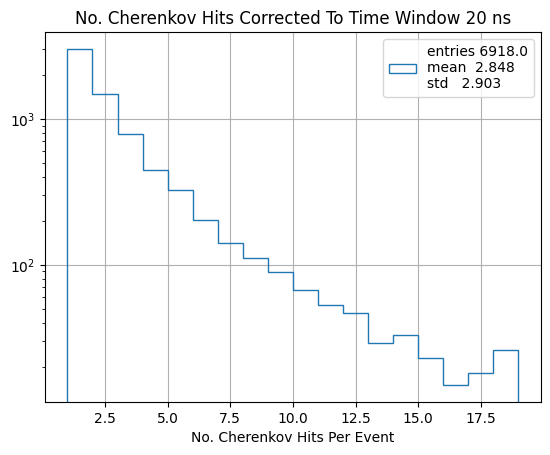

In [55]:
trigger_thershold = 4

nonZero_number_of_cherenkov_hits = [i for i in time_corrected_number_of_cherenkov_hits if i < 20]
pltext.hist(nonZero_number_of_cherenkov_hits, 18, xylabels="No. Cherenkov Hits Per Event", ylog=True);

plt.title("No. Cherenkov Hits Corrected To Time Window 20 ns");

In [31]:
len([i for i in time_corrected_number_of_cherenkov_hits if i < 40 and i >= 4])

1674

In [56]:
2110/nevents

0.0422

In [58]:
0.0422*3.7e5

15614.0

/tmp/ipykernel_2829179/1500876308.py:25: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 2e3)


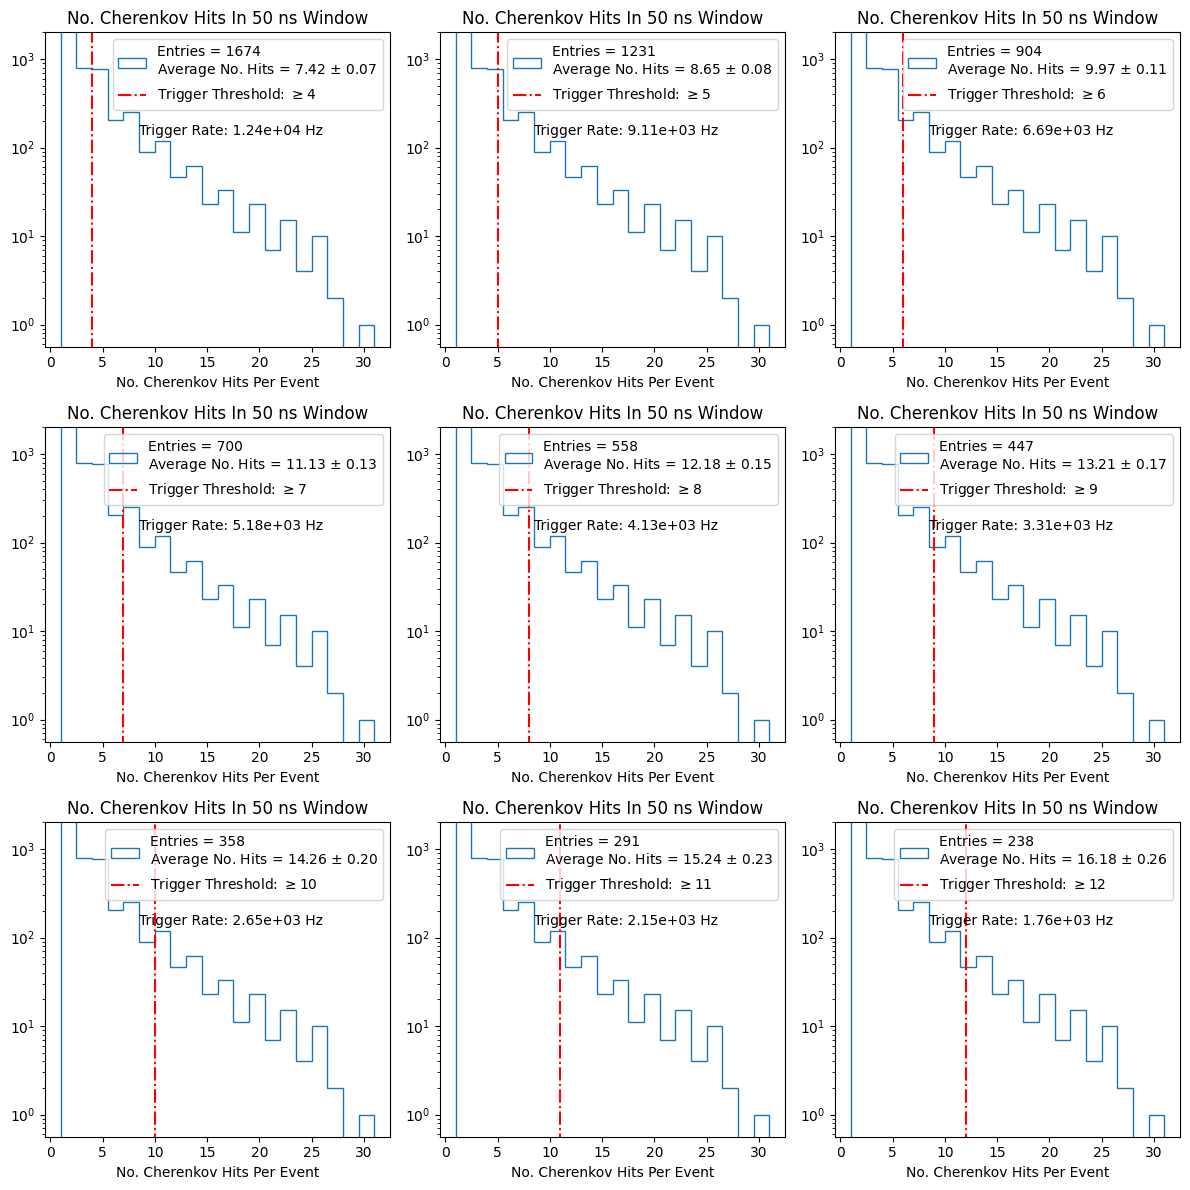

In [34]:
import matplotlib.pyplot as plt

trigger_thresholds = [4,5,6,7,8,9,10,11,12]

fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # Crear una cuadrícula de 3x3

for idx, threshold in enumerate(trigger_thresholds):
    row, col = divmod(idx, 3)  # Calcular posición en la cuadrícula
    ax = axes[row, col]  # Seleccionar el subplot correspondiente

    # Filtrar los datos correctamente
    filtered_hits = [hit for hit in time_corrected_number_of_cherenkov_hits if hit < 40]
    filtered_hits_to_threshold = [hit for hit in time_corrected_number_of_cherenkov_hits if 40 > hit >= threshold]

    # Graficar histograma
    ax.hist(filtered_hits, bins=20, histtype='step', label=generate_legend_text([hit for hit in time_corrected_number_of_cherenkov_hits if 40 > hit >= threshold]))
    ax.set_yscale('log')
    ax.set_xlabel("No. Cherenkov Hits Per Event")
    ax.set_title("No. Cherenkov Hits In 50 ns Window")

    # Línea de umbral
    ax.vlines(threshold, 0, 1e5, colors="red", linestyles="-.", label=fr"Trigger Threshold: $\geq {threshold}$")
    ax.text(8.5, 140, fr"Trigger Rate: {len(filtered_hits_to_threshold)/nevents*3.7e5:.2e} Hz");

    ax.set_ylim(0, 2e3)
    ax.legend(loc='upper right')

# for idx in range(len(trigger_thresholds), 20):
#     fig.delaxes(axes.flatten()[idx])
    
plt.tight_layout()  # Ajusta los espacios para evitar superposición
plt.show()


# Initial Gammas Analysis

In [6]:
initGammas_energy = df_simpleTracks[(df_simpleTracks["track_pid"].values == 22) & 
                                    (df_simpleTracks["track_creator_process"].values == "initial")]["track_energy"].values

initGammas_num    = df_simpleTracks[(df_simpleTracks["track_pid"].values == 22) & 
                                    (df_simpleTracks["track_creator_process"].values == "initial")].groupby("event_id").count()["track_pid"].values

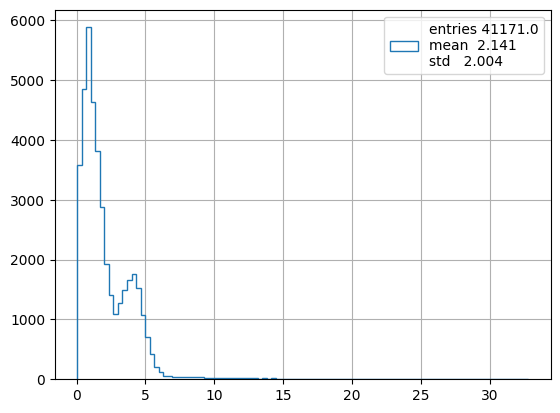

In [11]:
pltext.hist(df_simpleTracks[(df_simpleTracks["track_pid"].values == 22) & 
                (df_simpleTracks["track_creator_process"].values == "initial")].groupby("event_id").sum()["track_energy"].values, 100);

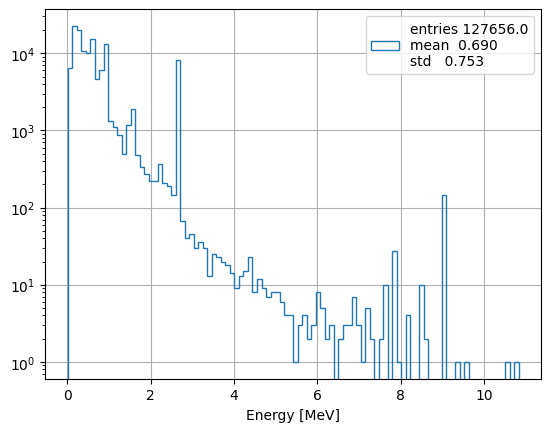

In [7]:
pltext.hist(initGammas_energy, 100, xylabels="Energy [MeV]", ylog=True);

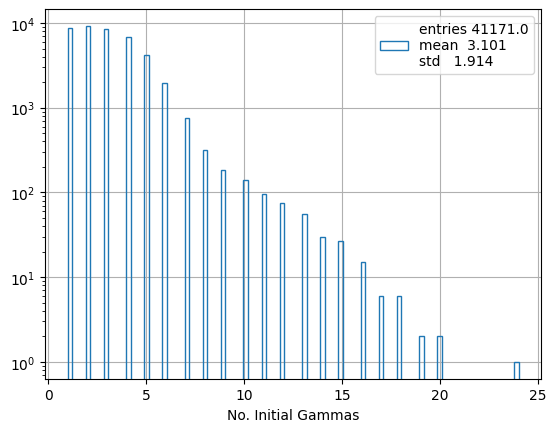

In [18]:
pltext.hist(initGammas_num, 100, xylabels="No. Initial Gammas", ylog=True);